# Fake News Detection Project
# Exploratory Data Analysis + Data Visualization


# Import libraries

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3
import nltk
from nltk.tokenize import word_tokenize

import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import STOPWORDS,WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

# LOADING PREPROCESSED DATASET strats_new.pkl

In [2]:
# retrieve dataset
strats_new = pd.read_pickle("strats_new.pkl")

In [3]:
strats_new.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,108,8,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,179,11,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,207,13,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,504,11,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,147,14,908,70


In [4]:
strats_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        177831 non-null  object 
 1   date                      177831 non-null  object 
 2   source                    177831 non-null  object 
 3   title                     177831 non-null  object 
 4   content                   177831 non-null  object 
 5   author                    177831 non-null  object 
 6   url                       177831 non-null  object 
 7   published                 177831 non-null  object 
 8   published_utc             177831 non-null  int64  
 9   collection_utc            177831 non-null  int64  
 10  country                   106074 non-null  object 
 11  label                     111280 non-null  float64
 12  bias                      111280 non-null  object 
 13  factuality                110158 non-null  f

In [5]:
# inspect labels
strats_new["label"].value_counts()

# slightly unbalanced


0.0    61222
1.0    50058
Name: label, dtype: int64

In [6]:
strats_new.isna().sum()

id                              0
date                            0
source                          0
title                           0
content                         0
author                          0
url                             0
published                       0
published_utc                   0
collection_utc                  0
country                     71757
label                       66551
bias                        66551
factuality                  67673
questionable-source         66551
conspiracy-pseudoscience    66551
pro-science                 66551
word_count_content              0
word_count_title                0
nb_character_content            0
nb_character_title              0
dtype: int64

### Time data

In [7]:
strats_new["date"]
# date only, no time

0         2022-04-26
1         2022-04-24
2         2022-07-15
3         2022-05-22
4         2022-03-11
             ...    
177826    2022-02-28
177827    2022-03-25
177828    2022-06-02
177829    2022-05-23
177830    2022-09-08
Name: date, Length: 177831, dtype: object

In [8]:
## create new variables from column date
strats_new["year"] = pd.to_datetime(strats_new["date"]).dt.year
strats_new["month"] = pd.to_datetime(strats_new["date"]).dt.month
strats_new["dayofyear"] = pd.to_datetime(strats_new["date"]).dt.dayofyear
strats_new["dayofthemonth"] = pd.to_datetime(strats_new["date"]).dt.day
strats_new["weekday"] = pd.to_datetime(strats_new["date"]).dt.weekday
strats_new["weekend"] = np.where(strats_new["weekday"].isin([5,6]), 1, 0)


## Analyse and preprocess countries


In [9]:
# get countries
strats_new["country"].value_counts()

USA                               70913
Russia                            10030
United Kingdom                     9386
UnitedKingdom                      3172
Unknown                            2647
Canada                             2092
USA (44/180 Press Freedom)         1742
Bulgaria                           1518
Germany (11/180 Press Freedom)     1240
France                             1057
Cyprus                              819
Israel                              588
Ireland                             375
Australia                           196
Macedonia                           186
Germany                              61
Japan                                25
Kenya                                20
Netherlands                           7
Name: country, dtype: int64

In [10]:
# harmonize countries
strats_new['country'].replace({'USA (44/180 Press Freedom)': 'USA', 'Germany (11/180 Press Freedom)': 'Germany', 'UnitedKingdom': 'United Kingdom'}, inplace=True)

In [11]:
# check whether it worked
strats_new["country"].value_counts()

USA               72655
United Kingdom    12558
Russia            10030
Unknown            2647
Canada             2092
Bulgaria           1518
Germany            1301
France             1057
Cyprus              819
Israel              588
Ireland             375
Australia           196
Macedonia           186
Japan                25
Kenya                20
Netherlands           7
Name: country, dtype: int64

# Data Visualization

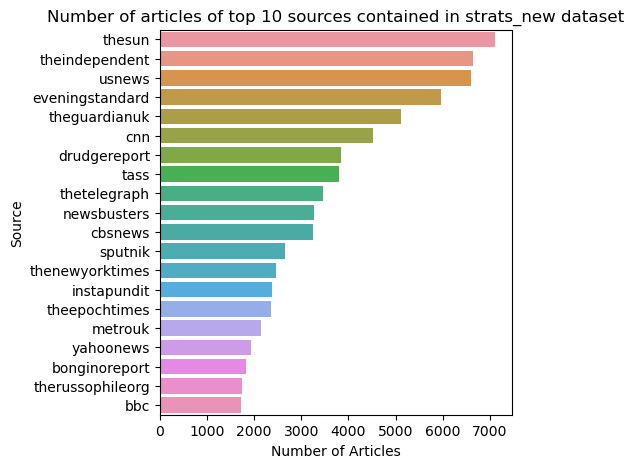

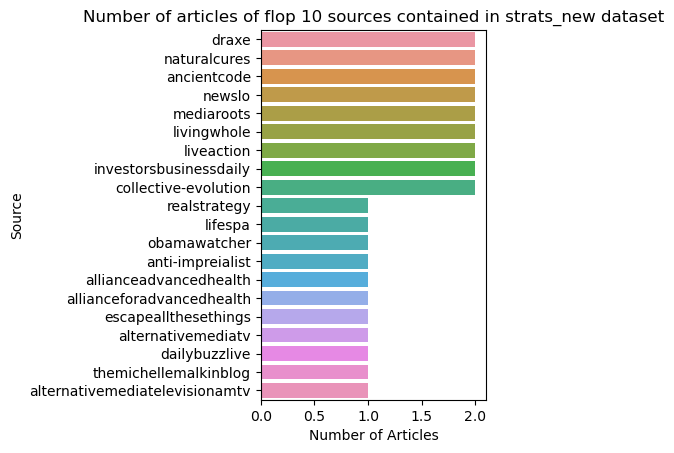

In [12]:
# GRAPH 1

# plot in one graph
plt.figure(figsize = (10,5))

# First Plot:
plt.subplot(1,2,1)
sns.countplot(y = strats_new["source"], order = strats_new["source"].value_counts().head(20).index)
plt.xlabel("Number of Articles")
plt.ylabel("Source")
plt.title("Number of articles of top 10 sources contained in strats_new dataset")
plt.show();


# Second Plot:
plt.subplot(1,2,2)
sns.countplot(y = strats_new["source"], order = strats_new["source"].value_counts().tail(20).index)
plt.xlabel("Number of Articles")
plt.ylabel("Source")
plt.title("Number of articles of flop 10 sources contained in strats_new dataset")
plt.show();


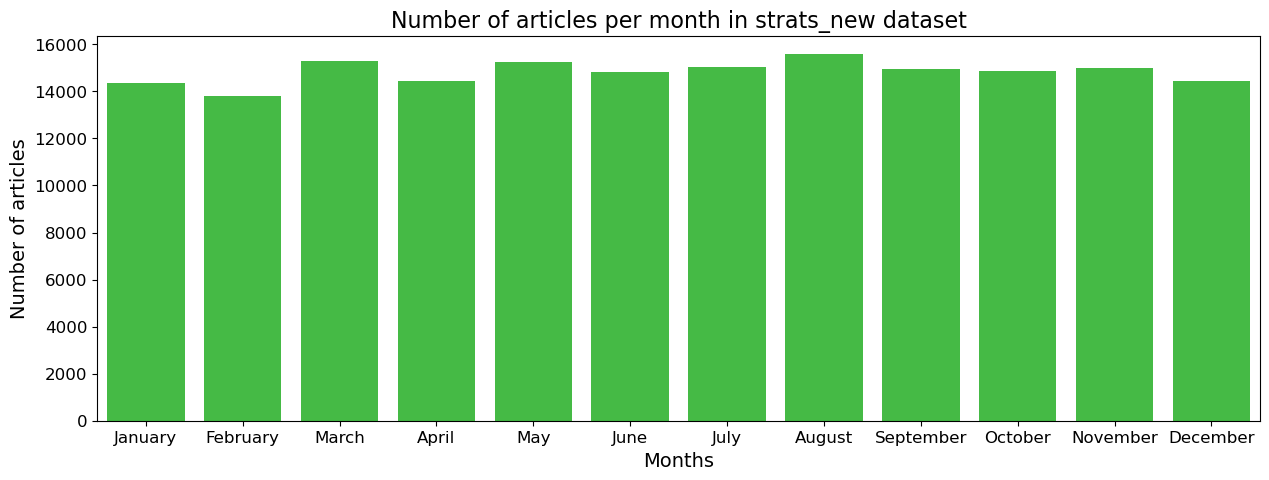

In [29]:
## GRAPH 2

## plot the number of articles per month
plt.figure(figsize=(15,5))
sns.countplot(x=strats_new.month, color="limegreen");
plt.xticks(np.arange(12),["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], fontsize=12);
plt.yticks(fontsize=12)
plt.ylabel("Number of articles", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.title("Number of articles per month in strats_new dataset", fontsize=16);


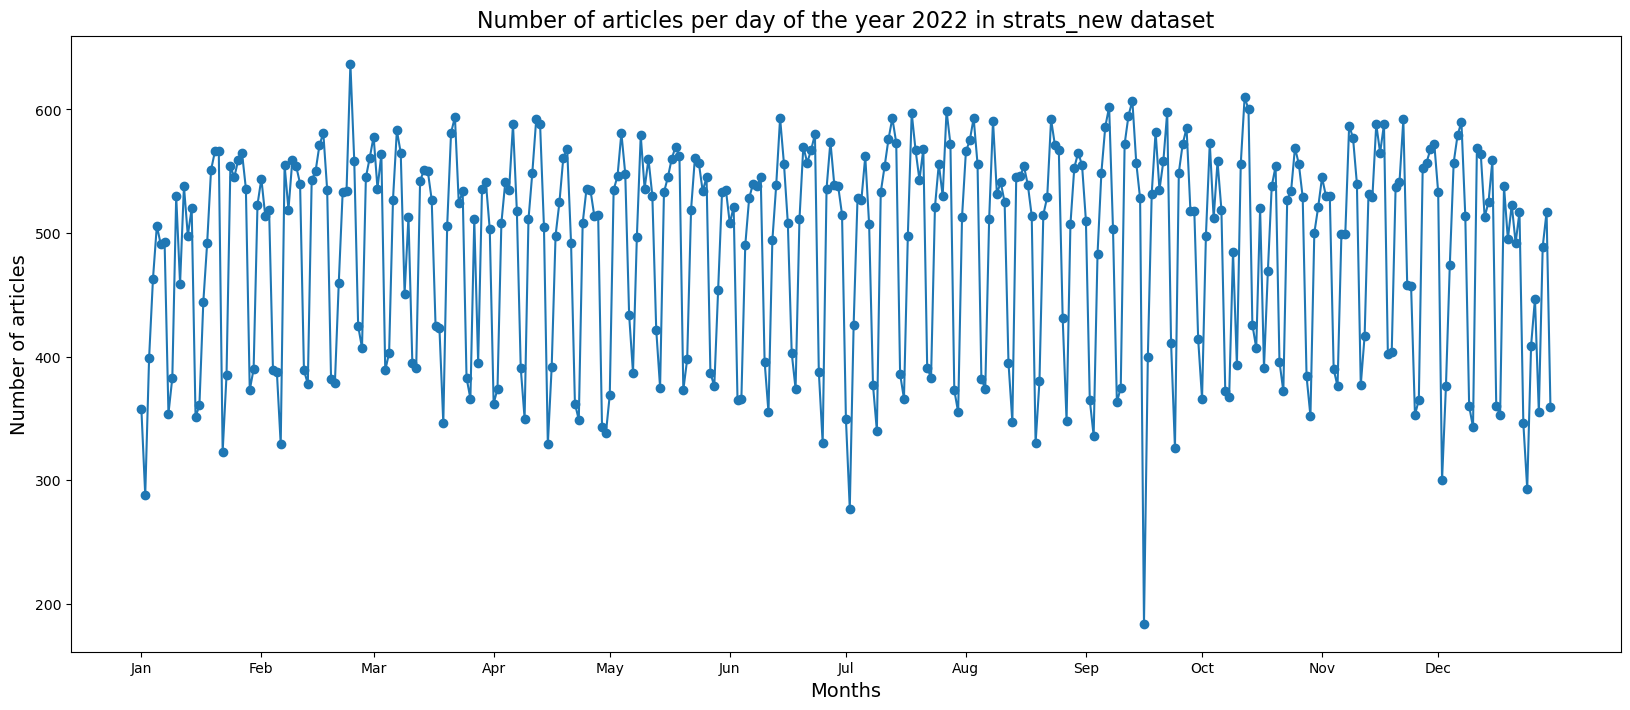

In [30]:
## GRAPH 3

## lineplot articles per day whole year
strats_new["date"].value_counts()

## sort the values and create a new variable
lineplot_data = strats_new["date"].value_counts().sort_index()

## plot
fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(111)
ax1.plot_date(lineplot_data.index, lineplot_data, linestyle='-')

## nicer x-axis
month_starts = [0,31,60,91,121,152,182,213,244,274,305,335]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(month_names)

plt.ylabel("Number of articles", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.title("Number of articles per day of the year 2022 in strats_new dataset", fontsize=16)

plt.show();


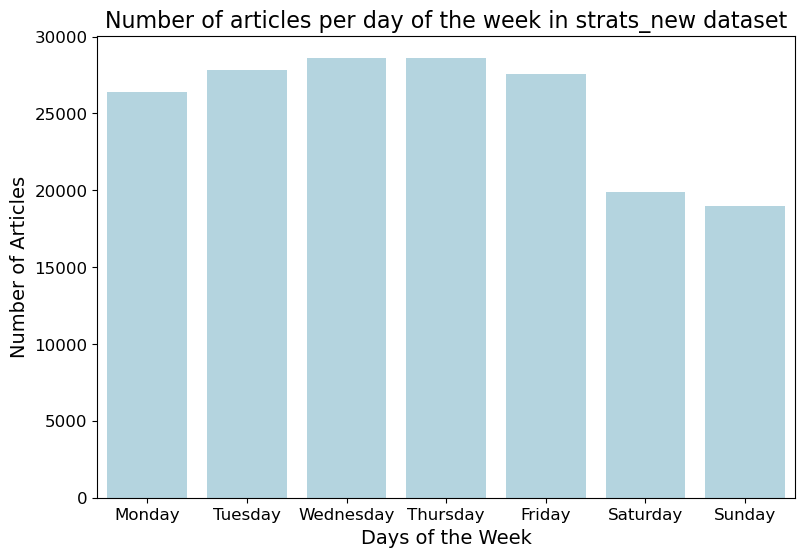

In [31]:
## GRAPH 4

# barplot number of articles per day of the week
fig = plt.figure(figsize = (9, 6))
sns.countplot (x = strats_new["weekday"], color = "lightblue")               
plt.xticks(np.arange(7),["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of Articles", fontsize=14)
plt.xlabel("Days of the Week", fontsize=14)
plt.title("Number of articles per day of the week in strats_new dataset", fontsize=16)
plt.show();




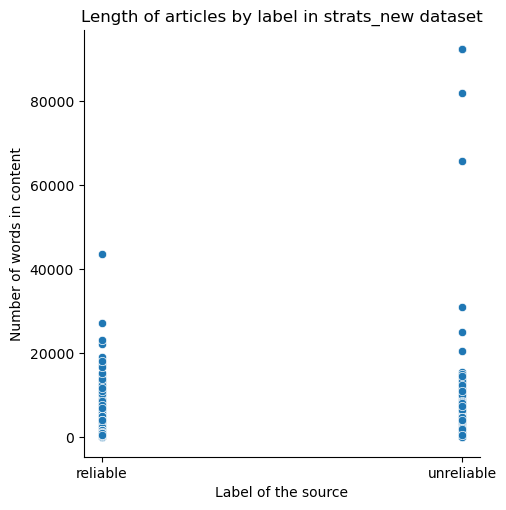

In [42]:
### GRAPH 5

# word count content and label
sns.relplot(x="label", y="word_count_content", data=strats_new)
plt.ylabel("Number of words in content")
plt.xlabel("Label of the source")
plt.title("Length of articles by label in strats_new dataset")
plt.xticks(np.arange(2),["reliable", "unreliable"])
plt.show();


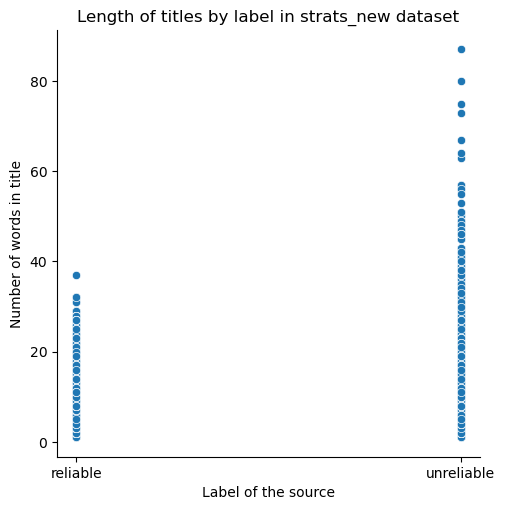

In [43]:
### GRAPH 6

# word count title and label
sns.relplot(x="label", y="word_count_title", data=strats_new)
plt.ylabel("Number of words in title")
plt.xlabel("Label of the source")
plt.title("Length of titles by label in strats_new dataset")
plt.xticks(np.arange(2),["reliable", "unreliable"])
plt.show();


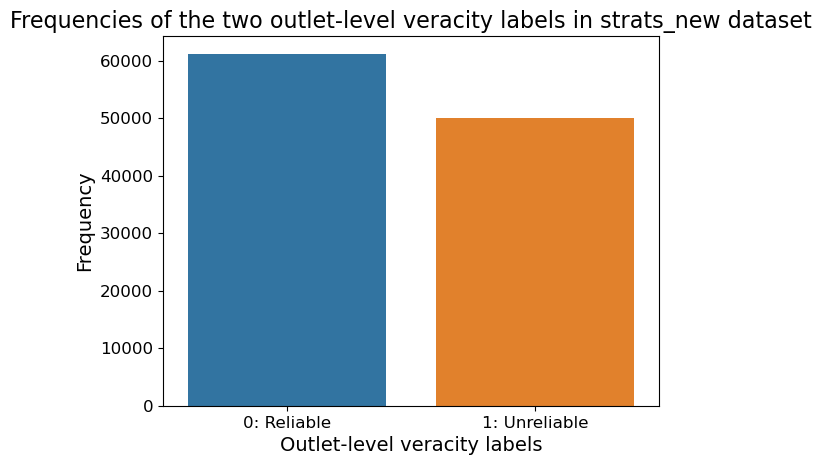

In [32]:
### GRAPH 7

# barplot of labels
sns.countplot(x = "label", data = strats_new)
plt.xticks(np.arange(2),["0: Reliable", "1: Unreliable"], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Outlet-level veracity labels", fontsize=14)
plt.title("Frequencies of the two outlet-level veracity labels in strats_new dataset", fontsize=16)
plt.show();


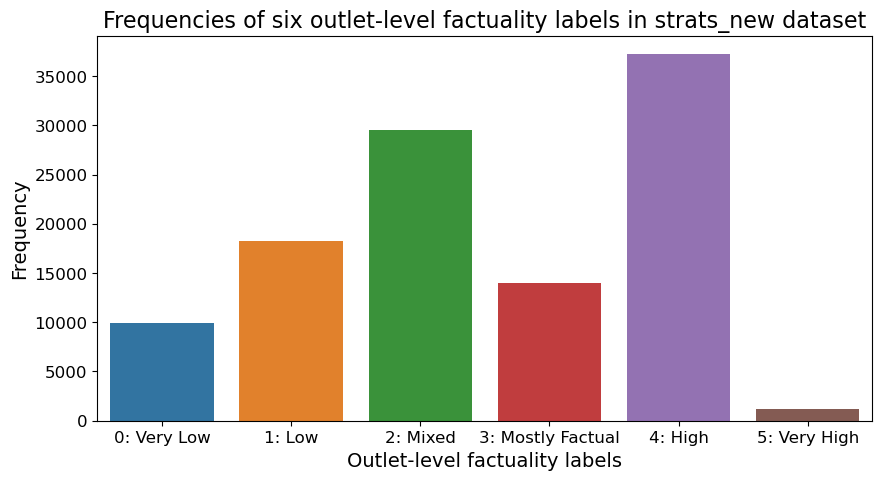

In [33]:
# GRAPH 8

# barplot of factuality values
fig = plt.figure(figsize=(10,5))
sns.countplot(x = "factuality", data = strats_new) 
plt.xticks(np.arange(6),["0: Very Low", "1: Low", "2: Mixed", "3: Mostly Factual", "4: High", "5: Very High"], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Outlet-level factuality labels", fontsize=14)
plt.title("Frequencies of six outlet-level factuality labels in strats_new dataset", fontsize=16)
plt.show();


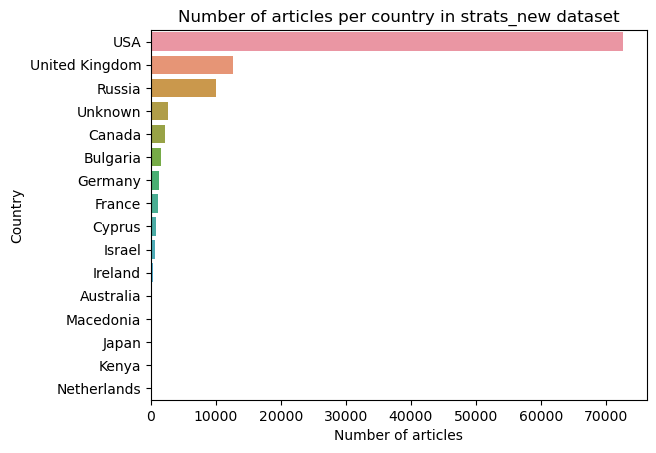

In [62]:
# GRAPH 9

# plot countries
sns.countplot(y = "country", data = strats_new, order = strats_new["country"].value_counts().index)
plt.ylabel("Country")
plt.xlabel("Number of articles")
plt.title("Number of articles per country in strats_new dataset")
plt.show();


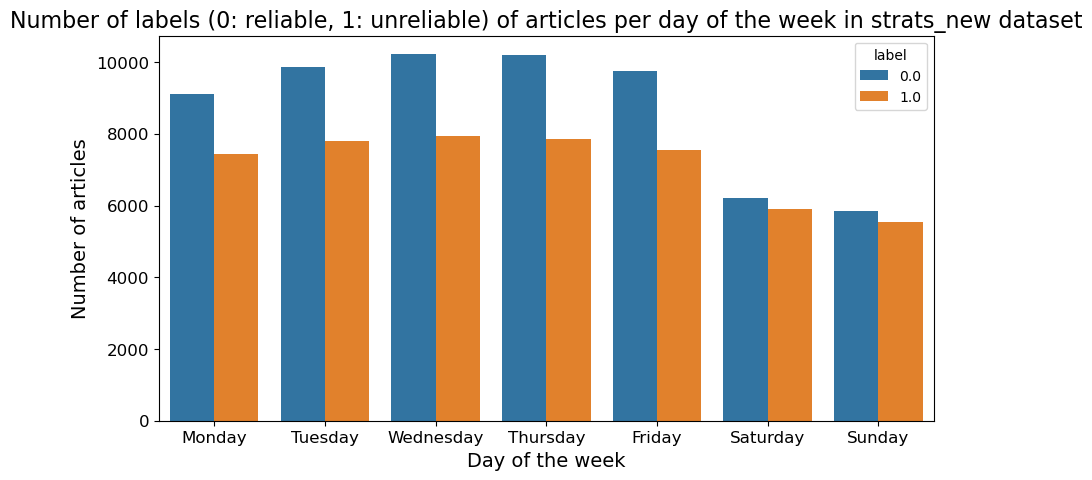

In [34]:
# GRAPH 10a

# plot labels per weekday
fig = plt.figure(figsize=(10,5))
sns.countplot(x="weekday", hue="label", data=strats_new)
plt.xticks(np.arange(7),["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of articles", fontsize=14)
plt.xlabel("Day of the week", fontsize=14)
plt.title("Number of labels (0: reliable, 1: unreliable) of articles per day of the week in strats_new dataset", fontsize=16)
plt.show();


In [17]:
# GRAPH 10b

# plot labels per weekday stacked
stacked_plot = strats_new.groupby(['weekday', 'label']).size().reset_index().pivot(columns='label', index='weekday', values=0)


<Figure size 1000x500 with 0 Axes>

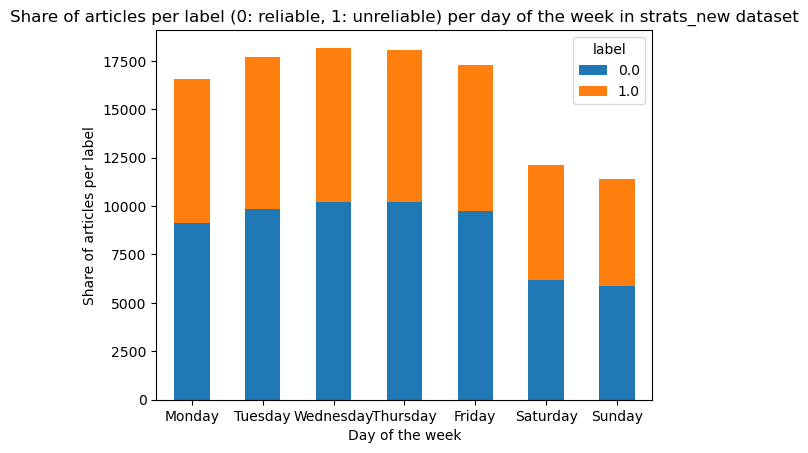

In [21]:
fig = plt.figure(figsize=(10, 5))
stacked_plot.plot(kind='bar', stacked=True)
plt.xticks(np.arange(7), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0)  # Set rotation to 0 degrees
plt.ylabel("Share of articles per label")
plt.xlabel("Day of the week")
plt.title("Share of articles per label (0: reliable, 1: unreliable) per day of the week in strats_new dataset")
plt.show();


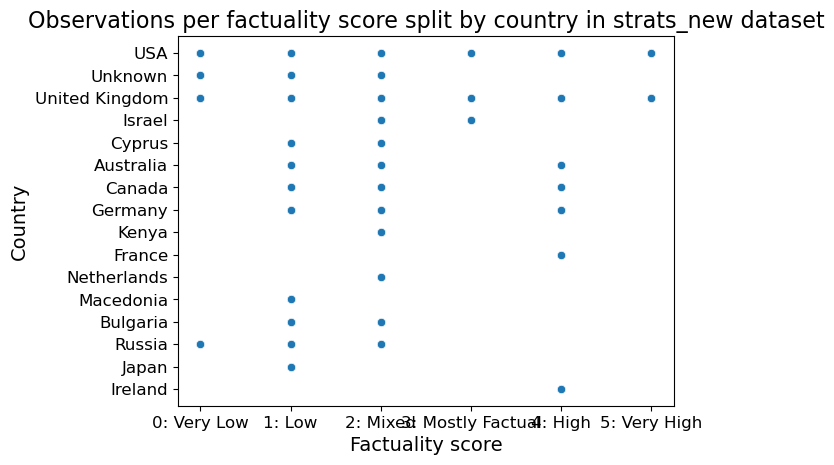

In [35]:
# GRAPH 11

# scatterplot factuality and country
sns.scatterplot(data=strats_new, x="factuality", y="country")
plt.xticks(np.arange(6),["0: Very Low", "1: Low", "2: Mixed", "3: Mostly Factual", "4: High", "5: Very High"], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize=14)
plt.xlabel("Factuality score", fontsize=14)
plt.title("Observations per factuality score split by country in strats_new dataset", fontsize=16)
plt.show();


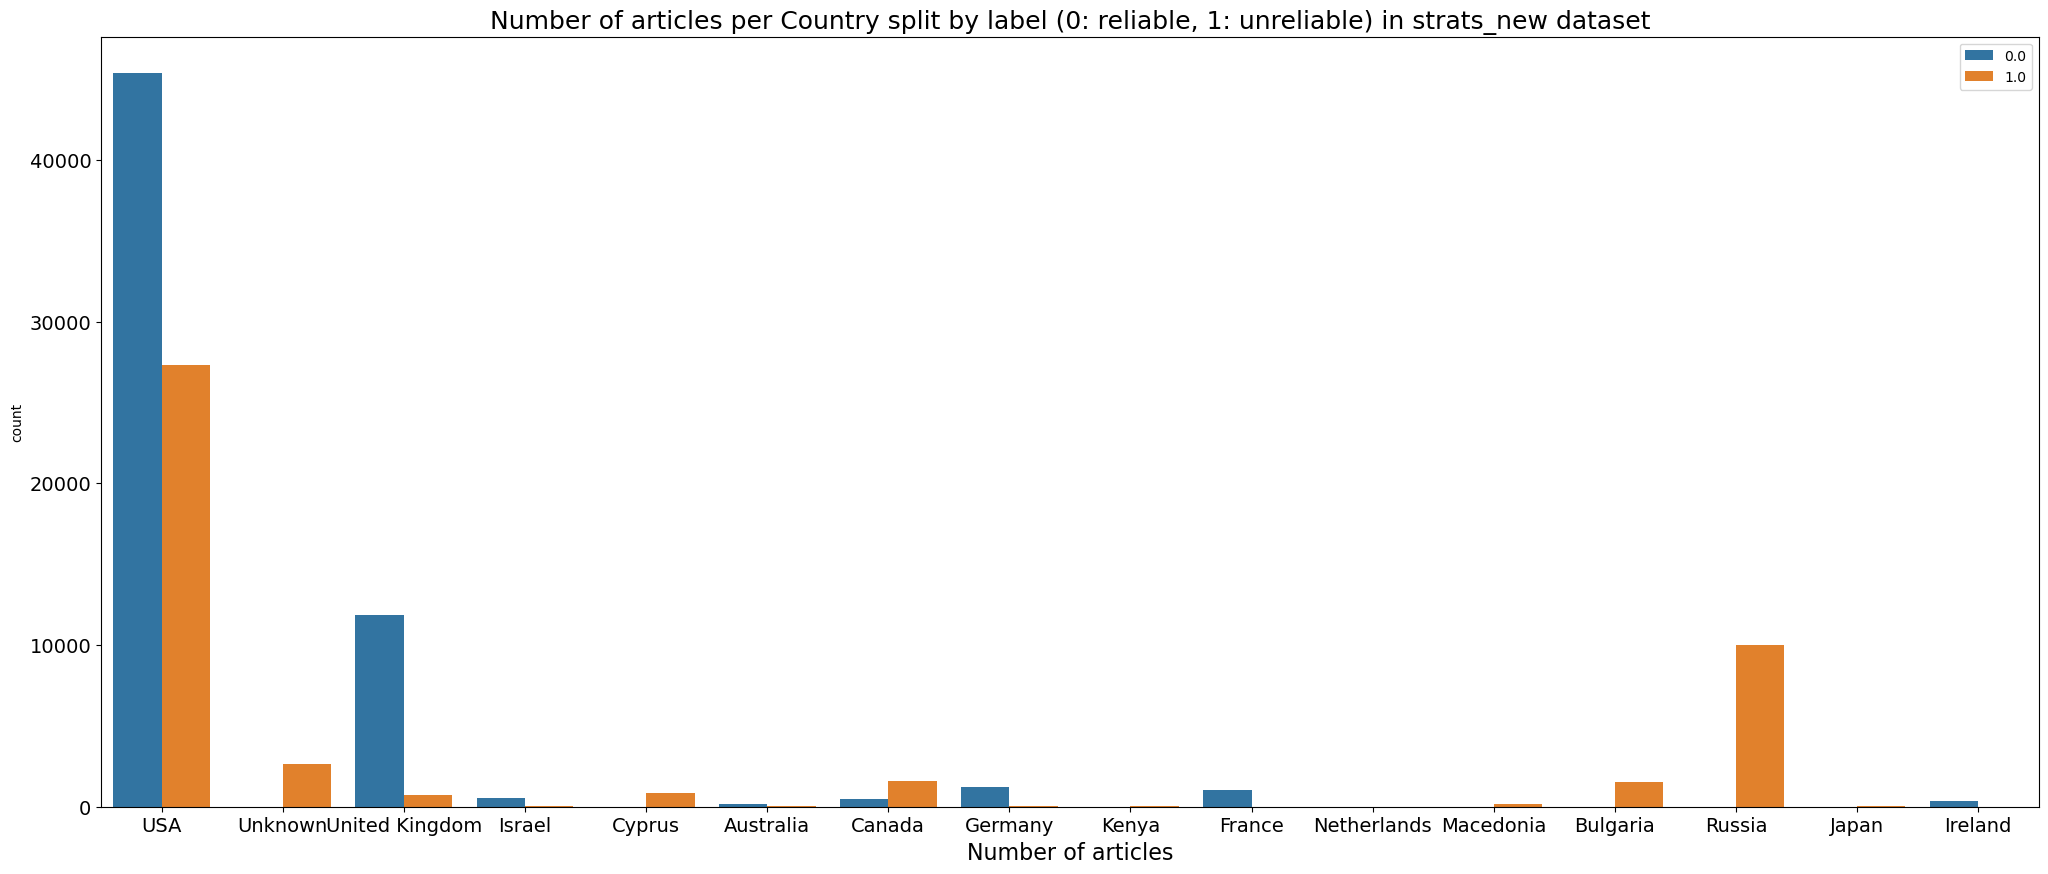

In [36]:
# GRAPH 12

# countries plotted by label
plt.figure(figsize=(25,10))
sns.countplot(x = strats_new["country"], hue = strats_new["label"])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country", fontsize=16)
plt.xlabel("Number of articles", fontsize=16)
plt.title("Number of articles per Country split by label (0: reliable, 1: unreliable) in strats_new dataset", fontsize=18)
plt.legend();


In [ ]:
# WORDCLOUDS

In [38]:
# Now we will place all of the required columns in one and delete all the not-so-required columns.
strats_new["text"] = strats_new["title"]+ " " + strats_new["content"]


### Clean the data

In [39]:
stop_words=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop_words.update(punctuation)
print(stop_words)


{"hadn't", 'i', 'whom', 'did', 'during', "isn't", 'just', 'ours', 'have', 'most', '<', 'now', 'ourselves', "mightn't", ';', ']', 'at', 'she', 'for', ':', 'but', 'm', 'these', 's', 'off', 'haven', 'been', "wouldn't", 'ain', 'am', 'doesn', 'd', 'above', "mustn't", '(', 'out', 'where', 'should', 'isn', 't', 'to', '}', 'him', 'her', 'herself', 'he', 'yourself', '`', 'through', "won't", 'against', 'can', 'hadn', 'under', 'which', 'few', 'does', 'didn', 'yourselves', 'had', 'same', 'the', "she's", 'in', 'from', 'there', 'more', 'himself', 'doing', 'll', 'y', '/', 'some', 'those', 'be', 'an', 'while', 'because', 'up', 'before', '-', '{', "you're", 'it', 'own', '?', 'my', 'our', '_', 'a', 'shouldn', 'other', 'wouldn', 'once', "that'll", "wasn't", 'with', "didn't", 'over', 'were', 'shan', '!', 'then', '[', 're', 'such', "needn't", 'hers', 'having', 'aren', 'further', 'why', 'me', "you've", 'hasn', 'of', 'theirs', 'too', '"', ')', 'on', 'again', 'very', 'about', 've', 'after', 'itself', "doesn't

In [40]:
def string_html(text12):
    soup=BeautifulSoup(text12,"html.parser")
    return soup.get_text()

def remove_square_brackets(text12):
    return re.sub('\[[^]]*\]','',text12)

def remove_URL(text12):
    return re.sub(r'http\S+','',text12)

def remove_stopwords(text12):
    final_text=[]
    for i in text12.split():
        if i.strip().lower() not in stop_words:
            final_text.append(i.strip())
    return " ".join(final_text)

def clean_text_data(text12):
    text=string_html(text12)
    text=remove_square_brackets(text12)
    text=remove_stopwords(text12)
    text=remove_URL(text12)
    return text12


In [41]:
# Now that we have defined the cleaning functions , let us use em' on our text data.

strats_new["text_cleaned"] = strats_new["text"].apply(clean_text_data)


C:\Users\Nutzer\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [ ]:
# GRAPH 13a

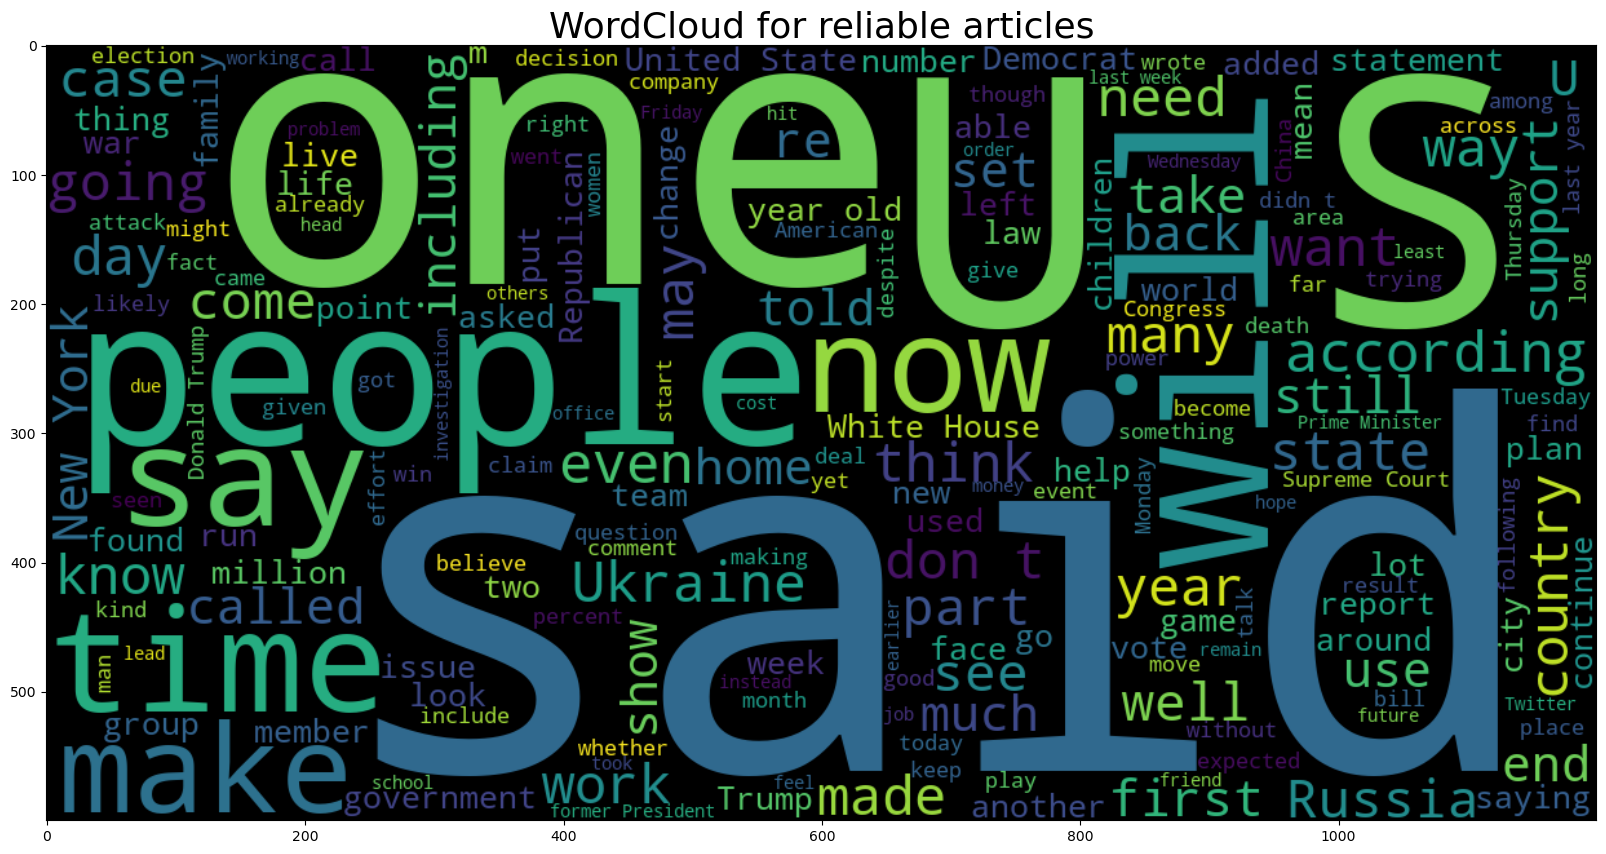

In [43]:
# Reliable News
plt.figure(figsize=(20, 20))
wordcloud=WordCloud(stopwords=STOPWORDS,height=600,width=1200).generate(" ".join(strats_new[strats_new.label==0].text_cleaned))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("WordCloud for reliable articles", fontsize=26);

In [ ]:
# GRAPH 13b

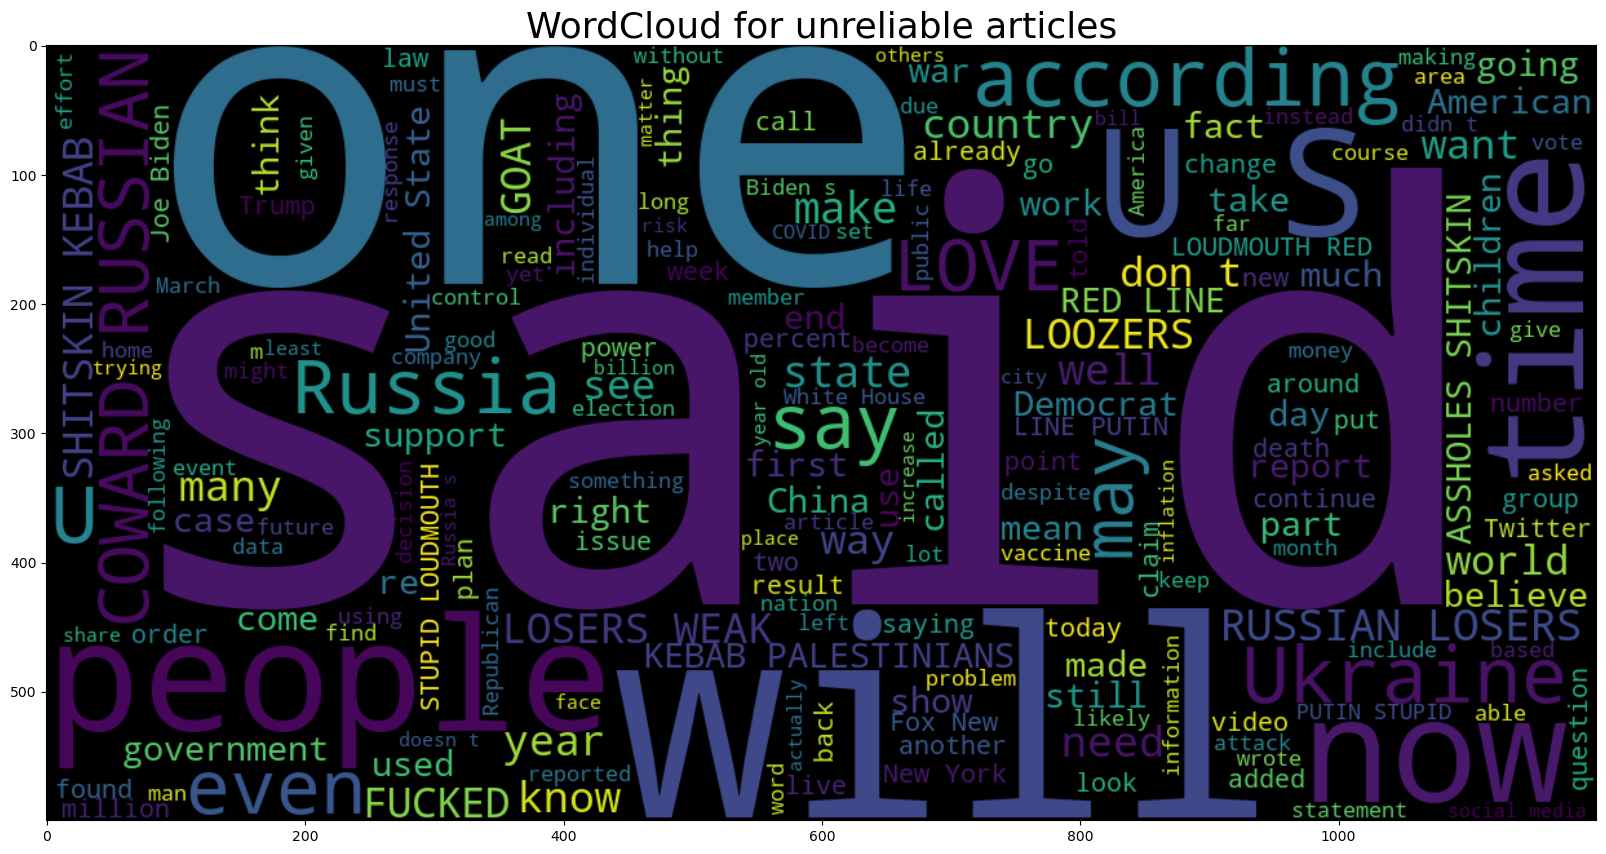

In [44]:
# Fake News
plt.figure(figsize=(20,20))
wordcloud=WordCloud(stopwords=STOPWORDS,height=600,width=1200).generate(" ".join(strats_new[strats_new.label==1].text_cleaned))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("WordCloud for unreliable articles", fontsize=26);

In [ ]:
# GRAPH 14

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


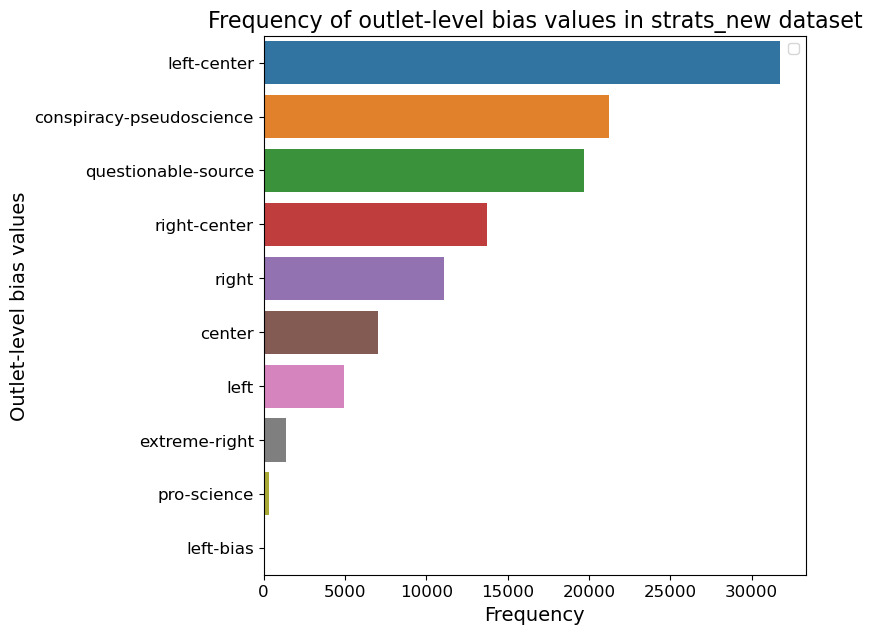

In [45]:
# bias values
plt.figure(figsize=(7,7))
sns.countplot(y = "bias", data = strats_new, order = strats_new["bias"].value_counts().index);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Outlet-level bias values", fontsize=14)
plt.title("Frequency of outlet-level bias values in strats_new dataset", fontsize=16)
plt.legend();


In [ ]:
# GRAPH 16

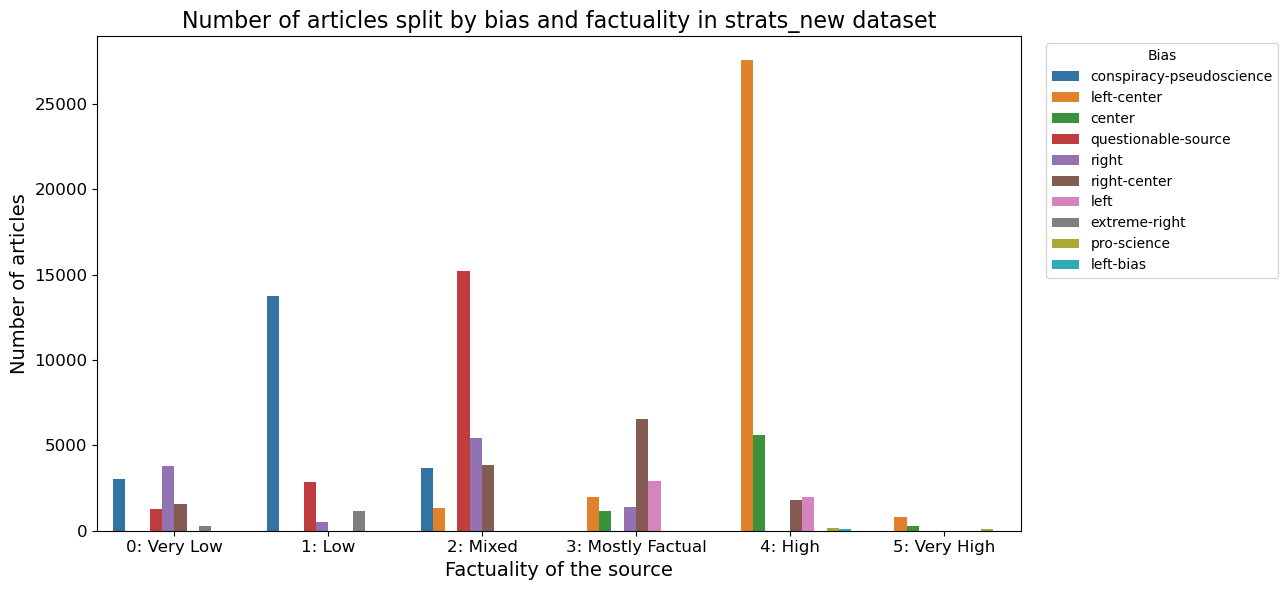

In [55]:
plt.figure(figsize=(13, 6))
sns.countplot(x = "factuality", hue = "bias", data = strats_new)
plt.xticks(np.arange(6),["0: Very Low", "1: Low", "2: Mixed", "3: Mostly Factual", "4: High", "5: Very High"], fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of articles", fontsize=14)
plt.xlabel("Factuality of the source", fontsize=14)
plt.title("Number of articles split by bias and factuality in strats_new dataset", fontsize=16)
# Move the legend outside of the graph
plt.legend(title="Bias", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show();